In [1]:
#!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
test = pd.read_csv('./data/test.csv')

In [4]:
# only refund date delete
df = pd.read_pickle('./data/data_3.pkl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8029111 entries, 827196 to 8856306
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   month_id                    int8   
 1   shop_id                     int8   
 2   item_id                     int16  
 3   cnt_month                   float32
 4   city_id                     int8   
 5   cat_id                      int8   
 6   main_cat                    int8   
 7   sub_cat                     int8   
 8   year                        int16  
 9   month                       int8   
 10  sales_month                 int8   
 11  cnt_month_1                 float32
 12  cnt_month_2                 float32
 13  cnt_month_3                 float32
 14  item_id_mean_cnt_1          float32
 15  item_id_mean_cnt_2          float32
 16  item_id_mean_cnt_3          float32
 17  sub_cat_mean_cnt_1          float32
 18  sub_cat_mean_cnt_2          float32
 19  sub_cat_mean_cnt

In [6]:
df.head()

,month_id,shop_id,item_id,cnt_month,city_id,cat_id,main_cat,sub_cat,year,month,...,sub_cat_mean_cnt_3,price_mean_mean_cnt_1,price_mean_mean_cnt_2,price_mean_mean_cnt_3,item_id/city_id_mean_cnt_1,item_id/city_id_mean_cnt_2,item_id/city_id_mean_cnt_3,shop_id/cat_id_mean_cnt_1,shop_id/cat_id_mean_cnt_2,shop_id/cat_id_mean_cnt_3
827196,3,25,8092,3.0,13,40,11,6,2013,4,...,0.0,1.401488,1.370914,0.0,1.000000,2.142857,0.0,1.087262,1.049296,0.0
827197,3,25,7850,3.0,13,30,8,54,2013,4,...,0.0,1.481977,1.467958,0.0,3.714286,2.285714,0.0,3.654494,2.279188,0.0
827198,3,25,8051,3.0,13,66,14,47,2013,4,...,0.0,0.000000,0.000000,0.0,0.000000,0.428571,0.0,1.827586,1.389474,0.0
827199,3,25,8088,1.0,13,55,13,4,2013,4,...,0.0,1.481977,0.000000,0.0,0.285714,0.000000,0.0,0.599845,0.562107,0.0
827200,3,25,8089,1.0,13,55,13,4,2013,4,...,0.0,0.000000,0.000000,0.0,0.571429,0.000000,0.0,0.599845,0.562107,0.0


In [7]:
s = ['cnt_month', 'cnt_month_1','cnt_month_2', 'cnt_month_3', 'item_id_mean_cnt_1','item_id_mean_cnt_2', 'item_id_mean_cnt_3', 
        'sub_cat_mean_cnt_1','sub_cat_mean_cnt_2', 'sub_cat_mean_cnt_3', 'price_mean_mean_cnt_1',
       'price_mean_mean_cnt_2', 'price_mean_mean_cnt_3','item_id/city_id_mean_cnt_1', 'item_id/city_id_mean_cnt_2',
       'item_id/city_id_mean_cnt_3', 'shop_id/cat_id_mean_cnt_1','shop_id/cat_id_mean_cnt_2', 'shop_id/cat_id_mean_cnt_3']

In [8]:
# value clip(0~20)
df[s] = df[s].clip(0, 20)

In [9]:
# train/validation/test data split
X_train = df[df['month_id'] < 33].drop(['cnt_month'], axis=1)
Y_train = df[df['month_id'] < 33]['cnt_month']

X_valid = df[df['month_id'] == 33].drop(['cnt_month'], axis=1)
Y_valid = df[df['month_id'] == 33]['cnt_month']

X_test = df[df['month_id'] == 34].drop(['cnt_month'], axis=1)

In [10]:
model = CatBoostRegressor()

In [11]:
ts = time.time()
model.fit(
    X_train, Y_train, 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)],  # 유효성 검사 데이터 세트
    )

print('소요시간: ',time.time()-ts)

Learning rate set to 0.207073
0:	learn: 1.1470932	test: 1.1470932	test1: 1.0147957	best: 1.0147957 (0)	total: 1.33s	remaining: 22m 5s
1:	learn: 1.0866095	test: 1.0866095	test1: 0.9696602	best: 0.9696602 (1)	total: 2.5s	remaining: 20m 46s
2:	learn: 1.0448569	test: 1.0448569	test1: 0.9397069	best: 0.9397069 (2)	total: 3.65s	remaining: 20m 12s
3:	learn: 1.0158599	test: 1.0158599	test1: 0.9213130	best: 0.9213130 (3)	total: 4.82s	remaining: 20m
4:	learn: 0.9911628	test: 0.9911628	test1: 0.9013485	best: 0.9013485 (4)	total: 6.1s	remaining: 20m 14s
5:	learn: 0.9740897	test: 0.9740897	test1: 0.8890320	best: 0.8890320 (5)	total: 7.38s	remaining: 20m 21s
6:	learn: 0.9629003	test: 0.9629003	test1: 0.8826015	best: 0.8826015 (6)	total: 8.65s	remaining: 20m 27s
7:	learn: 0.9550629	test: 0.9550629	test1: 0.8784950	best: 0.8784950 (7)	total: 10s	remaining: 20m 40s
8:	learn: 0.9460154	test: 0.9460154	test1: 0.8712074	best: 0.8712074 (8)	total: 11.3s	remaining: 20m 47s
9:	learn: 0.9399177	test: 0.939917

77:	learn: 0.8777218	test: 0.8777218	test1: 0.8218574	best: 0.8218574 (77)	total: 1m 37s	remaining: 19m 10s
78:	learn: 0.8775091	test: 0.8775091	test1: 0.8216628	best: 0.8216628 (78)	total: 1m 38s	remaining: 19m 7s
79:	learn: 0.8771179	test: 0.8771179	test1: 0.8210015	best: 0.8210015 (79)	total: 1m 39s	remaining: 19m 7s
80:	learn: 0.8768775	test: 0.8768775	test1: 0.8212491	best: 0.8210015 (79)	total: 1m 40s	remaining: 19m 4s
81:	learn: 0.8761709	test: 0.8761709	test1: 0.8199101	best: 0.8199101 (81)	total: 1m 41s	remaining: 19m 1s
82:	learn: 0.8756829	test: 0.8756829	test1: 0.8199330	best: 0.8199101 (81)	total: 1m 43s	remaining: 19m 2s
83:	learn: 0.8753953	test: 0.8753953	test1: 0.8194104	best: 0.8194104 (83)	total: 1m 44s	remaining: 19m 1s
84:	learn: 0.8751834	test: 0.8751834	test1: 0.8193682	best: 0.8193682 (84)	total: 1m 45s	remaining: 18m 57s
85:	learn: 0.8748486	test: 0.8748486	test1: 0.8188995	best: 0.8188995 (85)	total: 1m 47s	remaining: 18m 58s
86:	learn: 0.8746376	test: 0.87463

153:	learn: 0.8589384	test: 0.8589384	test1: 0.8126441	best: 0.8106615 (151)	total: 3m	remaining: 16m 34s
154:	learn: 0.8584565	test: 0.8584565	test1: 0.8127567	best: 0.8106615 (151)	total: 3m 1s	remaining: 16m 32s
155:	learn: 0.8582414	test: 0.8582414	test1: 0.8127080	best: 0.8106615 (151)	total: 3m 3s	remaining: 16m 30s
156:	learn: 0.8581074	test: 0.8581074	test1: 0.8127676	best: 0.8106615 (151)	total: 3m 4s	remaining: 16m 29s
157:	learn: 0.8579603	test: 0.8579603	test1: 0.8127004	best: 0.8106615 (151)	total: 3m 5s	remaining: 16m 27s
158:	learn: 0.8578264	test: 0.8578264	test1: 0.8130117	best: 0.8106615 (151)	total: 3m 6s	remaining: 16m 25s
159:	learn: 0.8576846	test: 0.8576846	test1: 0.8129113	best: 0.8106615 (151)	total: 3m 7s	remaining: 16m 24s
160:	learn: 0.8575807	test: 0.8575807	test1: 0.8128547	best: 0.8106615 (151)	total: 3m 8s	remaining: 16m 22s
161:	learn: 0.8573528	test: 0.8573528	test1: 0.8131095	best: 0.8106615 (151)	total: 3m 9s	remaining: 16m 20s
162:	learn: 0.8569965	

228:	learn: 0.8465692	test: 0.8465692	test1: 0.8099637	best: 0.8087687 (183)	total: 4m 22s	remaining: 14m 45s
229:	learn: 0.8464959	test: 0.8464959	test1: 0.8098949	best: 0.8087687 (183)	total: 4m 24s	remaining: 14m 43s
230:	learn: 0.8464537	test: 0.8464537	test1: 0.8098920	best: 0.8087687 (183)	total: 4m 25s	remaining: 14m 42s
231:	learn: 0.8463610	test: 0.8463610	test1: 0.8099012	best: 0.8087687 (183)	total: 4m 25s	remaining: 14m 40s
232:	learn: 0.8462630	test: 0.8462630	test1: 0.8097381	best: 0.8087687 (183)	total: 4m 27s	remaining: 14m 39s
233:	learn: 0.8460781	test: 0.8460781	test1: 0.8091291	best: 0.8087687 (183)	total: 4m 28s	remaining: 14m 37s
234:	learn: 0.8456005	test: 0.8456005	test1: 0.8091106	best: 0.8087687 (183)	total: 4m 29s	remaining: 14m 36s
235:	learn: 0.8455212	test: 0.8455212	test1: 0.8089181	best: 0.8087687 (183)	total: 4m 30s	remaining: 14m 35s
236:	learn: 0.8452791	test: 0.8452791	test1: 0.8089011	best: 0.8087687 (183)	total: 4m 31s	remaining: 14m 33s
237:	learn

303:	learn: 0.8382237	test: 0.8382237	test1: 0.8099982	best: 0.8085542 (238)	total: 5m 44s	remaining: 13m 8s
304:	learn: 0.8381646	test: 0.8381646	test1: 0.8113635	best: 0.8085542 (238)	total: 5m 45s	remaining: 13m 6s
305:	learn: 0.8380612	test: 0.8380612	test1: 0.8113410	best: 0.8085542 (238)	total: 5m 46s	remaining: 13m 5s
306:	learn: 0.8380097	test: 0.8380097	test1: 0.8114067	best: 0.8085542 (238)	total: 5m 47s	remaining: 13m 3s
307:	learn: 0.8378637	test: 0.8378637	test1: 0.8115909	best: 0.8085542 (238)	total: 5m 48s	remaining: 13m 2s
308:	learn: 0.8378087	test: 0.8378087	test1: 0.8136535	best: 0.8085542 (238)	total: 5m 49s	remaining: 13m 1s
309:	learn: 0.8377446	test: 0.8377446	test1: 0.8136628	best: 0.8085542 (238)	total: 5m 50s	remaining: 13m
310:	learn: 0.8377018	test: 0.8377018	test1: 0.8136327	best: 0.8085542 (238)	total: 5m 51s	remaining: 12m 58s
311:	learn: 0.8374578	test: 0.8374578	test1: 0.8131924	best: 0.8085542 (238)	total: 5m 52s	remaining: 12m 58s
312:	learn: 0.837397

378:	learn: 0.8317395	test: 0.8317395	test1: 0.8139732	best: 0.8085542 (238)	total: 7m 5s	remaining: 11m 36s
379:	learn: 0.8316528	test: 0.8316528	test1: 0.8139245	best: 0.8085542 (238)	total: 7m 6s	remaining: 11m 35s
380:	learn: 0.8316171	test: 0.8316171	test1: 0.8138366	best: 0.8085542 (238)	total: 7m 7s	remaining: 11m 34s
381:	learn: 0.8315627	test: 0.8315627	test1: 0.8138067	best: 0.8085542 (238)	total: 7m 8s	remaining: 11m 33s
382:	learn: 0.8315212	test: 0.8315212	test1: 0.8140195	best: 0.8085542 (238)	total: 7m 9s	remaining: 11m 32s
383:	learn: 0.8314280	test: 0.8314280	test1: 0.8139950	best: 0.8085542 (238)	total: 7m 10s	remaining: 11m 31s
384:	learn: 0.8314009	test: 0.8314009	test1: 0.8139653	best: 0.8085542 (238)	total: 7m 12s	remaining: 11m 30s
385:	learn: 0.8313071	test: 0.8313071	test1: 0.8140073	best: 0.8085542 (238)	total: 7m 13s	remaining: 11m 29s
386:	learn: 0.8312424	test: 0.8312424	test1: 0.8140138	best: 0.8085542 (238)	total: 7m 14s	remaining: 11m 27s
387:	learn: 0.8

453:	learn: 0.8257199	test: 0.8257199	test1: 0.8097715	best: 0.8085542 (238)	total: 8m 26s	remaining: 10m 9s
454:	learn: 0.8256794	test: 0.8256794	test1: 0.8097102	best: 0.8085542 (238)	total: 8m 28s	remaining: 10m 8s
455:	learn: 0.8256335	test: 0.8256335	test1: 0.8097052	best: 0.8085542 (238)	total: 8m 29s	remaining: 10m 7s
456:	learn: 0.8253391	test: 0.8253391	test1: 0.8102148	best: 0.8085542 (238)	total: 8m 30s	remaining: 10m 6s
457:	learn: 0.8253014	test: 0.8253014	test1: 0.8115407	best: 0.8085542 (238)	total: 8m 31s	remaining: 10m 4s
458:	learn: 0.8252595	test: 0.8252595	test1: 0.8115233	best: 0.8085542 (238)	total: 8m 32s	remaining: 10m 3s
459:	learn: 0.8252252	test: 0.8252252	test1: 0.8115351	best: 0.8085542 (238)	total: 8m 33s	remaining: 10m 2s
460:	learn: 0.8251793	test: 0.8251793	test1: 0.8115139	best: 0.8085542 (238)	total: 8m 34s	remaining: 10m 1s
461:	learn: 0.8251271	test: 0.8251271	test1: 0.8110953	best: 0.8085542 (238)	total: 8m 35s	remaining: 10m
462:	learn: 0.8250901	

529:	learn: 0.8197453	test: 0.8197453	test1: 0.8164257	best: 0.8085542 (238)	total: 9m 50s	remaining: 8m 43s
530:	learn: 0.8196980	test: 0.8196980	test1: 0.8164904	best: 0.8085542 (238)	total: 9m 51s	remaining: 8m 42s
531:	learn: 0.8196667	test: 0.8196667	test1: 0.8165097	best: 0.8085542 (238)	total: 9m 52s	remaining: 8m 41s
532:	learn: 0.8196123	test: 0.8196123	test1: 0.8165491	best: 0.8085542 (238)	total: 9m 53s	remaining: 8m 40s
533:	learn: 0.8195686	test: 0.8195686	test1: 0.8164458	best: 0.8085542 (238)	total: 9m 55s	remaining: 8m 39s
534:	learn: 0.8195276	test: 0.8195276	test1: 0.8164930	best: 0.8085542 (238)	total: 9m 56s	remaining: 8m 38s
535:	learn: 0.8194912	test: 0.8194912	test1: 0.8165241	best: 0.8085542 (238)	total: 9m 57s	remaining: 8m 37s
536:	learn: 0.8192724	test: 0.8192724	test1: 0.8163448	best: 0.8085542 (238)	total: 9m 58s	remaining: 8m 36s
537:	learn: 0.8191841	test: 0.8191841	test1: 0.8157921	best: 0.8085542 (238)	total: 9m 59s	remaining: 8m 35s
538:	learn: 0.81915

604:	learn: 0.8147117	test: 0.8147117	test1: 0.8180669	best: 0.8085542 (238)	total: 11m 15s	remaining: 7m 21s
605:	learn: 0.8146679	test: 0.8146679	test1: 0.8179662	best: 0.8085542 (238)	total: 11m 16s	remaining: 7m 19s
606:	learn: 0.8145857	test: 0.8145857	test1: 0.8180004	best: 0.8085542 (238)	total: 11m 17s	remaining: 7m 18s
607:	learn: 0.8145635	test: 0.8145635	test1: 0.8179871	best: 0.8085542 (238)	total: 11m 18s	remaining: 7m 17s
608:	learn: 0.8145242	test: 0.8145242	test1: 0.8179195	best: 0.8085542 (238)	total: 11m 19s	remaining: 7m 16s
609:	learn: 0.8144898	test: 0.8144898	test1: 0.8179680	best: 0.8085542 (238)	total: 11m 20s	remaining: 7m 15s
610:	learn: 0.8144716	test: 0.8144716	test1: 0.8179352	best: 0.8085542 (238)	total: 11m 21s	remaining: 7m 14s
611:	learn: 0.8144043	test: 0.8144043	test1: 0.8179530	best: 0.8085542 (238)	total: 11m 23s	remaining: 7m 13s
612:	learn: 0.8143517	test: 0.8143517	test1: 0.8179575	best: 0.8085542 (238)	total: 11m 24s	remaining: 7m 12s
613:	learn

679:	learn: 0.8105182	test: 0.8105182	test1: 0.8190979	best: 0.8085542 (238)	total: 12m 37s	remaining: 5m 56s
680:	learn: 0.8104919	test: 0.8104919	test1: 0.8191066	best: 0.8085542 (238)	total: 12m 38s	remaining: 5m 55s
681:	learn: 0.8104688	test: 0.8104688	test1: 0.8190694	best: 0.8085542 (238)	total: 12m 39s	remaining: 5m 54s
682:	learn: 0.8104289	test: 0.8104289	test1: 0.8190438	best: 0.8085542 (238)	total: 12m 40s	remaining: 5m 53s
683:	learn: 0.8103986	test: 0.8103986	test1: 0.8189972	best: 0.8085542 (238)	total: 12m 41s	remaining: 5m 51s
684:	learn: 0.8103733	test: 0.8103733	test1: 0.8190263	best: 0.8085542 (238)	total: 12m 42s	remaining: 5m 50s
685:	learn: 0.8103094	test: 0.8103094	test1: 0.8187066	best: 0.8085542 (238)	total: 12m 44s	remaining: 5m 49s
686:	learn: 0.8102561	test: 0.8102561	test1: 0.8187674	best: 0.8085542 (238)	total: 12m 45s	remaining: 5m 48s
687:	learn: 0.8102135	test: 0.8102135	test1: 0.8187809	best: 0.8085542 (238)	total: 12m 46s	remaining: 5m 47s
688:	learn

754:	learn: 0.8071792	test: 0.8071792	test1: 0.8188700	best: 0.8085542 (238)	total: 13m 59s	remaining: 4m 32s
755:	learn: 0.8071431	test: 0.8071431	test1: 0.8188440	best: 0.8085542 (238)	total: 14m	remaining: 4m 31s
756:	learn: 0.8071133	test: 0.8071133	test1: 0.8188761	best: 0.8085542 (238)	total: 14m 1s	remaining: 4m 30s
757:	learn: 0.8070799	test: 0.8070799	test1: 0.8190309	best: 0.8085542 (238)	total: 14m 2s	remaining: 4m 29s
758:	learn: 0.8070133	test: 0.8070133	test1: 0.8190475	best: 0.8085542 (238)	total: 14m 4s	remaining: 4m 28s
759:	learn: 0.8068972	test: 0.8068972	test1: 0.8190041	best: 0.8085542 (238)	total: 14m 5s	remaining: 4m 26s
760:	learn: 0.8068510	test: 0.8068510	test1: 0.8185107	best: 0.8085542 (238)	total: 14m 6s	remaining: 4m 25s
761:	learn: 0.8068180	test: 0.8068180	test1: 0.8184731	best: 0.8085542 (238)	total: 14m 7s	remaining: 4m 24s
762:	learn: 0.8067797	test: 0.8067797	test1: 0.8185775	best: 0.8085542 (238)	total: 14m 8s	remaining: 4m 23s
763:	learn: 0.8067511

829:	learn: 0.8030518	test: 0.8030518	test1: 0.8209466	best: 0.8085542 (238)	total: 15m 25s	remaining: 3m 9s
830:	learn: 0.8030202	test: 0.8030202	test1: 0.8209411	best: 0.8085542 (238)	total: 15m 26s	remaining: 3m 8s
831:	learn: 0.8029963	test: 0.8029963	test1: 0.8209611	best: 0.8085542 (238)	total: 15m 27s	remaining: 3m 7s
832:	learn: 0.8029764	test: 0.8029764	test1: 0.8212448	best: 0.8085542 (238)	total: 15m 29s	remaining: 3m 6s
833:	learn: 0.8029634	test: 0.8029634	test1: 0.8212759	best: 0.8085542 (238)	total: 15m 30s	remaining: 3m 5s
834:	learn: 0.8029335	test: 0.8029335	test1: 0.8212790	best: 0.8085542 (238)	total: 15m 31s	remaining: 3m 3s
835:	learn: 0.8029025	test: 0.8029025	test1: 0.8211726	best: 0.8085542 (238)	total: 15m 32s	remaining: 3m 2s
836:	learn: 0.8028809	test: 0.8028809	test1: 0.8211669	best: 0.8085542 (238)	total: 15m 33s	remaining: 3m 1s
837:	learn: 0.8028461	test: 0.8028461	test1: 0.8211680	best: 0.8085542 (238)	total: 15m 34s	remaining: 3m
838:	learn: 0.8027503	

904:	learn: 0.7999969	test: 0.7999969	test1: 0.8210756	best: 0.8085542 (238)	total: 16m 50s	remaining: 1m 46s
905:	learn: 0.7999742	test: 0.7999742	test1: 0.8210835	best: 0.8085542 (238)	total: 16m 51s	remaining: 1m 44s
906:	learn: 0.7999473	test: 0.7999473	test1: 0.8210722	best: 0.8085542 (238)	total: 16m 52s	remaining: 1m 43s
907:	learn: 0.7996945	test: 0.7996945	test1: 0.8192087	best: 0.8085542 (238)	total: 16m 53s	remaining: 1m 42s
908:	learn: 0.7996268	test: 0.7996268	test1: 0.8189761	best: 0.8085542 (238)	total: 16m 55s	remaining: 1m 41s
909:	learn: 0.7996098	test: 0.7996098	test1: 0.8189648	best: 0.8085542 (238)	total: 16m 56s	remaining: 1m 40s
910:	learn: 0.7995785	test: 0.7995785	test1: 0.8189892	best: 0.8085542 (238)	total: 16m 57s	remaining: 1m 39s
911:	learn: 0.7995555	test: 0.7995555	test1: 0.8190105	best: 0.8085542 (238)	total: 16m 58s	remaining: 1m 38s
912:	learn: 0.7995230	test: 0.7995230	test1: 0.8190825	best: 0.8085542 (238)	total: 16m 59s	remaining: 1m 37s
913:	learn

980:	learn: 0.7961717	test: 0.7961717	test1: 0.8193097	best: 0.8085542 (238)	total: 18m 18s	remaining: 21.3s
981:	learn: 0.7961464	test: 0.7961464	test1: 0.8192603	best: 0.8085542 (238)	total: 18m 19s	remaining: 20.2s
982:	learn: 0.7960867	test: 0.7960867	test1: 0.8192661	best: 0.8085542 (238)	total: 18m 20s	remaining: 19s
983:	learn: 0.7960589	test: 0.7960589	test1: 0.8192204	best: 0.8085542 (238)	total: 18m 21s	remaining: 17.9s
984:	learn: 0.7959993	test: 0.7959993	test1: 0.8193143	best: 0.8085542 (238)	total: 18m 22s	remaining: 16.8s
985:	learn: 0.7959831	test: 0.7959831	test1: 0.8193199	best: 0.8085542 (238)	total: 18m 24s	remaining: 15.7s
986:	learn: 0.7959386	test: 0.7959386	test1: 0.8193462	best: 0.8085542 (238)	total: 18m 25s	remaining: 14.6s
987:	learn: 0.7959111	test: 0.7959111	test1: 0.8193448	best: 0.8085542 (238)	total: 18m 26s	remaining: 13.4s
988:	learn: 0.7958789	test: 0.7958789	test1: 0.8193663	best: 0.8085542 (238)	total: 18m 27s	remaining: 12.3s
989:	learn: 0.7958437

In [12]:
Y_pred = model.predict(X_valid)

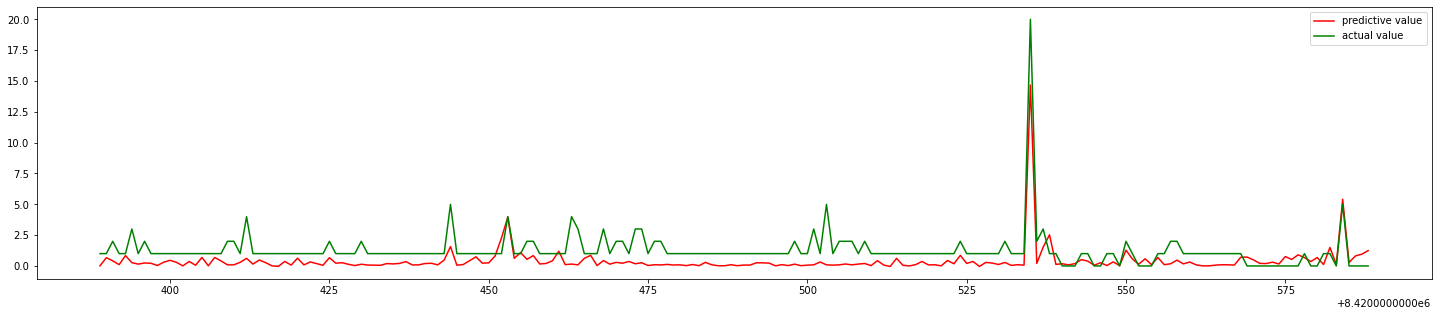

In [13]:
submission = pd.DataFrame({
    "ID": X_valid.index, 
    "item_cnt_month": Y_pred
})
x = submission['ID'].head(200)
y_pred = submission['item_cnt_month'].head(200)
y_true = Y_valid.head(200)
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)
ax.plot(x, y_pred, label = 'predictive value', color = 'red')
ax.plot(x, y_true, label = 'actual value', color = 'green')

ax.legend()

plt.show()

In [14]:
Y_test = model.predict(X_test)

In [15]:
# 제출 파일 생성
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('./submission/submission_CatBoost_2022022803.csv', index=False)